## 1. Data Quality Checks

In [25]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Ragini\\Downloads\\1722506184_hr_comma_sep\\HR_comma_sep.csv")
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_l

 ## 2. Exploratory Data Analysis (EDA)

## 2.1. Correlation Heatmap

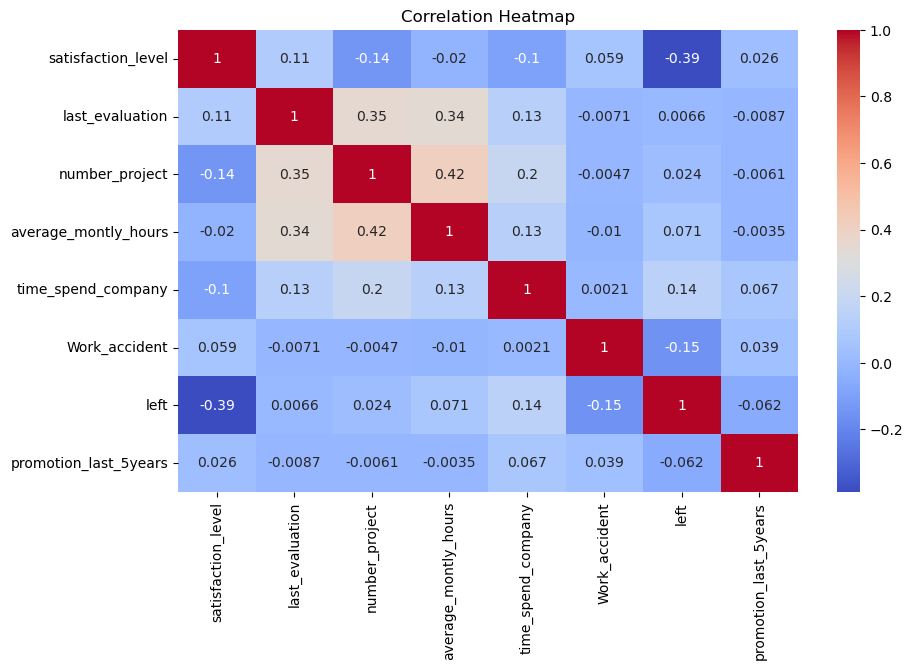

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns before correlation
numeric_df = df.drop(columns=['sales', 'salary'])  # drop any other non-numeric columns if present

# Correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



## 2.2. Distribution Plots

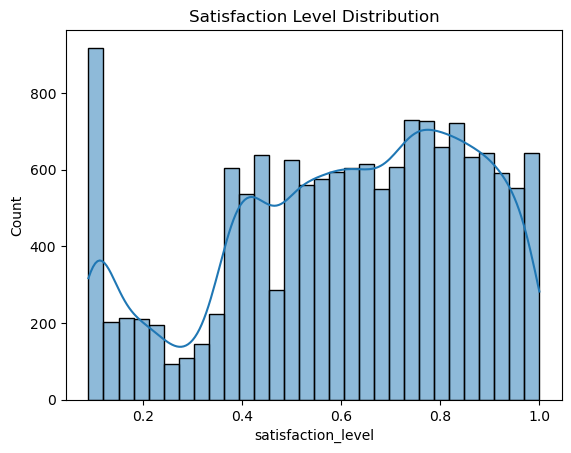

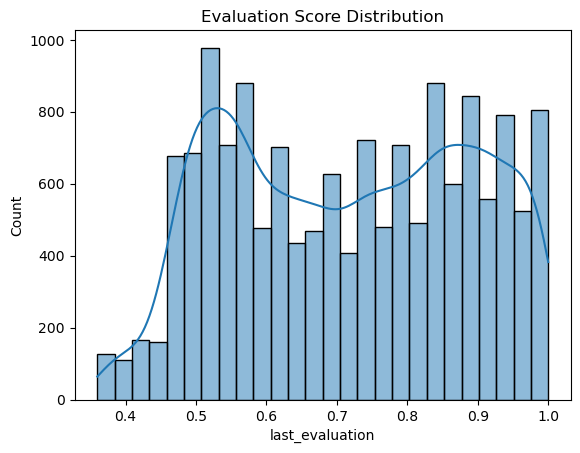

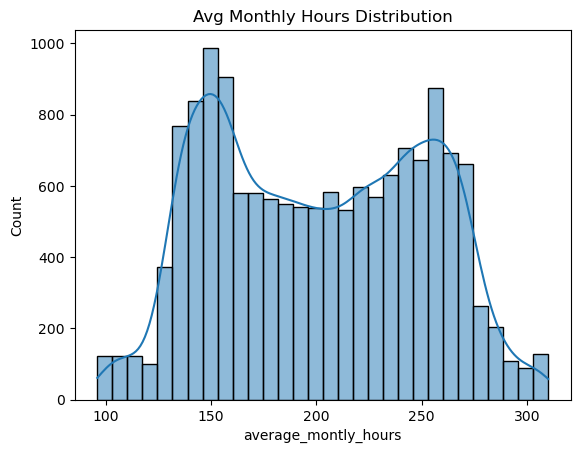

In [34]:
# Satisfaction Level
sns.histplot(df['satisfaction_level'], kde=True)
plt.title('Satisfaction Level Distribution')
plt.show()

# Last Evaluation
sns.histplot(df['last_evaluation'], kde=True)
plt.title('Evaluation Score Distribution')
plt.show()

# Average Monthly Hours
sns.histplot(df['average_montly_hours'], kde=True)
plt.title('Avg Monthly Hours Distribution')
plt.show()


## 2.3. Bar Plot: Projects vs Left

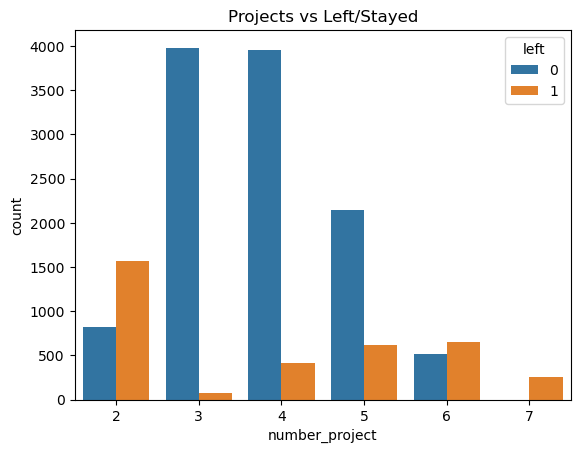

In [36]:
sns.countplot(data=df, x='number_project', hue='left')
plt.title('Projects vs Left/Stayed')
plt.show()

# Inference Example:
# Employees with very high/very low project counts tend to leave more.


## 3. Clustering of Employees Who Left

## 3.1. Filter and Use K-Means

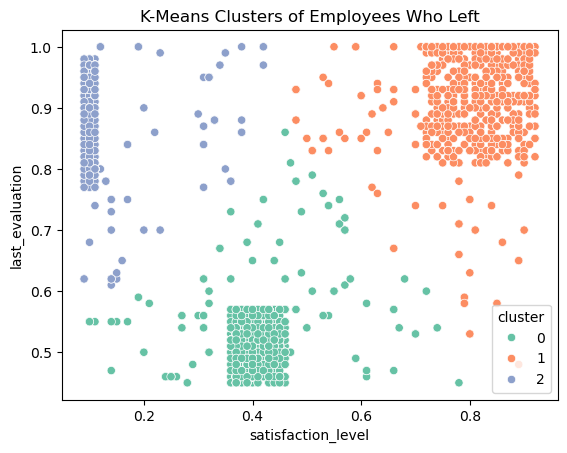

In [39]:
from sklearn.cluster import KMeans

left_employees = df[df['left'] == 1][['satisfaction_level', 'last_evaluation']]
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees['cluster'] = kmeans.fit_predict(left_employees)

sns.scatterplot(data=left_employees, x='satisfaction_level', y='last_evaluation', hue='cluster', palette='Set2')
plt.title('K-Means Clusters of Employees Who Left')
plt.show()

# Give your interpretation of each cluster’s satisfaction vs evaluation trend.


## 4. Handling Class Imbalance with SMOTE

### 4.1. Convert Categorical → Numerical

In [44]:
# Separate numerical and categorical columns
cat_cols = ['sales', 'salary']  # not 'Department'
num_cols = df.drop(columns=cat_cols + ['left']).columns  # exclude 'left' too for X

# One-hot encode categorical variables
cat_df = pd.get_dummies(df[cat_cols], drop_first=True)

# Combine numeric and encoded categorical
X = pd.concat([df[num_cols], cat_df], axis=1)
y = df['left']  # Target variable



### 4.2 Train Test Split

In [47]:
from sklearn.model_selection import train_test_split

X = df_processed.drop('left', axis=1)
y = df_processed['left']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)


### 4.3. SMOTE

In [62]:
# Combine X_train and y_train if they are separated earlier
train_df = pd.concat([X_train, y_train], axis=1)

# Identify categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

# Convert categorical columns to dummy variables
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=True)

# Separate X and y again
X_train_encoded = train_df_encoded.drop('left', axis=1)
y_train_encoded = train_df_encoded['left']

# Now apply SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_encoded, y_train_encoded)

# Optional: check class balance
print(y_train_encoded.value_counts(), "\n")
print(y_train_res.value_counts())


left
0    9142
1    2857
Name: count, dtype: int64 

left
0    9142
1    9142
Name: count, dtype: int64


##  5. Model Training with Cross-Validation

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for name, model in models.items():
    print(f"\nModel: {name}")
    y_pred = cross_val_predict(model, X_train_res, y_train_res, cv=5)
    print(classification_report(y_train_res, y_pred))



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.77      0.79      9142
           1       0.78      0.82      0.80      9142

    accuracy                           0.79     18284
   macro avg       0.80      0.79      0.79     18284
weighted avg       0.80      0.79      0.79     18284


Model: Random Forest
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      9142
           1       1.00      0.97      0.98      9142

    accuracy                           0.98     18284
   macro avg       0.98      0.98      0.98     18284
weighted avg       0.98      0.98      0.98     18284


Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9142
           1       0.98      0.95      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     1828

## 6. Model Evaluation

### 6.1. ROC-AUC and Curve

In [75]:
# Assume df is your original cleaned DataFrame
df_encoded = pd.get_dummies(df, drop_first=True)

# Now split
from sklearn.model_selection import train_test_split

X = df_encoded.drop('left', axis=1)
y = df_encoded['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Then SMOTE
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)


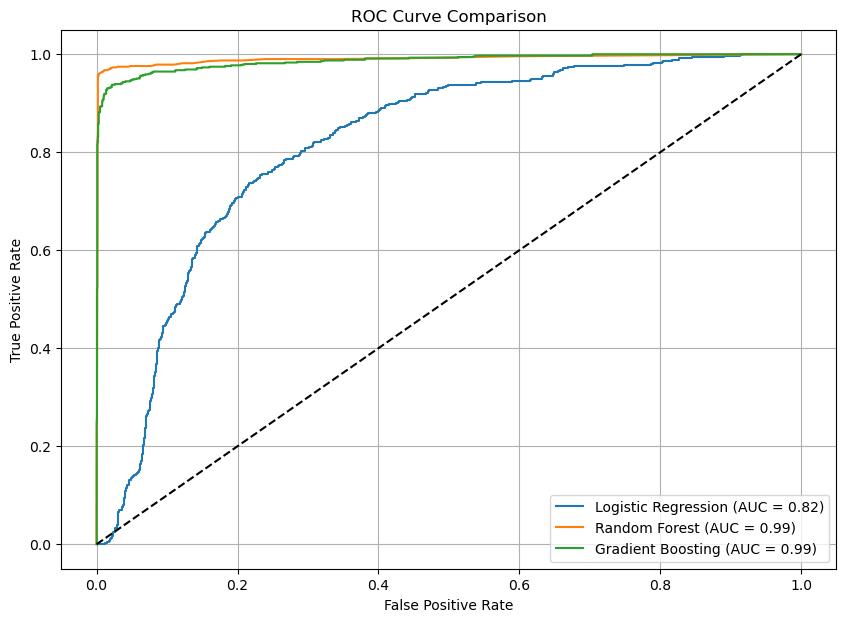

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


### 6.2. Confusion Matrix

In [93]:
from sklearn.metrics import confusion_matrix

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n{name} Confusion Matrix:\n{cm}")



Logistic Regression Confusion Matrix:
[[1784  510]
 [ 184  522]]

Random Forest Confusion Matrix:
[[2282   12]
 [  27  679]]

Gradient Boosting Confusion Matrix:
[[2244   50]
 [  44  662]]


### 6.3. Recall vs Precision?
        Recall is more important here
        We want to catch most of the employees who are likely to leave (positive class). 
        Missing such predictions might lead to unexpected resignations.

## 7. Retention Strategies Based on Prediction Zones

## 7.1. Predict Turnover Probabilities

In [80]:
best_model = GradientBoostingClassifier()
best_model.fit(X_train_res, y_train_res)
y_proba = best_model.predict_proba(X_test)[:, 1]


## 7.2. Categorize Risk Zones

In [82]:
risk = pd.DataFrame({'probability': y_proba})
risk['risk_zone'] = pd.cut(
    risk['probability'],
    bins=[0.0, 0.2, 0.6, 0.9, 1.0],
    labels=['Safe Zone (Green)', 'Low-Risk (Yellow)', 'Medium-Risk (Orange)', 'High-Risk (Red)']
)

print(risk['risk_zone'].value_counts())


risk_zone
Safe Zone (Green)       2116
High-Risk (Red)          616
Low-Risk (Yellow)        199
Medium-Risk (Orange)      69
Name: count, dtype: int64
